#  2. (Comparar muestras de una Geométrica)

Prueba de Chi-Cuadrado:
Estadístico Chi2: 24.545690929222914, p-valor: 0.003517053871192189
Prueba de Kolmogorov-Smirnov:
Estadístico KS: 0.038, p-valor: 0.4659595288557257
Rechazamos la hipótesis nula para la prueba de Chi-Cuadrado: Las muestras no provienen de la misma distribución.
No rechazamos la hipótesis nula para la prueba de Kolmogorov-Smirnov: Las muestras podrían ser de la misma distribución.


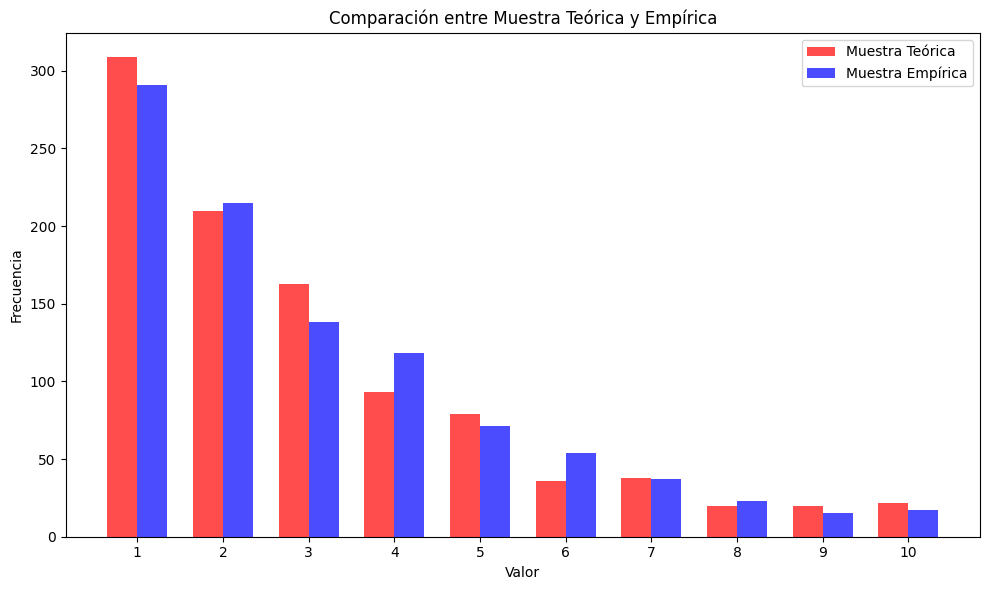

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Parámetros
p = 0.3  # Probabilidad de éxito
N = 1000  # Tamaño de muestra

# Paso 1: Generar una muestra teórica de una distribución geométrica con probabilidad p
teorica_muestra = stats.geom.rvs(p, size=N)

# Paso 2: Crear una muestra empírica usando el método de la transformada inversa
u = np.random.uniform(0, 1, N)  # Números aleatorios uniformes
muestra_empirica = np.ceil(np.log(1 - u) / np.log(1 - p)).astype(int)  # Aplicación de la inversa de la función de distribución acumulativa

# Paso 3: Crear tablas de frecuencia con un límite de categorías
max_valor = min(10, max(np.max(teorica_muestra), np.max(muestra_empirica)))  # Limitar las categorías a un valor razonable
intervalos = np.arange(1, max_valor + 2)  # Definir intervalos desde 1 hasta max_valor + 1

# Calcular las frecuencias en cada intervalo para ambas muestras
frecuencias_teorica, _ = np.histogram(teorica_muestra, bins=intervalos)
frecuencias_empirica, _ = np.histogram(muestra_empirica, bins=intervalos)

# Ajuste para que ambas frecuencias tengan la misma suma
ajuste_factor = frecuencias_empirica.sum() / frecuencias_teorica.sum()
frecuencias_teorica_ajustada = frecuencias_teorica * ajuste_factor

# Prueba de Chi-Cuadrado
chi2_stat, p_valor_chi2 = stats.chisquare(frecuencias_empirica, f_exp=frecuencias_teorica_ajustada)

# Paso 4: Realizar la prueba de Kolmogorov-Smirnov
ks_stat, p_valor_ks = stats.ks_2samp(teorica_muestra, muestra_empirica)

# Mostrar resultados
print("Prueba de Chi-Cuadrado:")
print(f"Estadístico Chi2: {chi2_stat}, p-valor: {p_valor_chi2}")
print("Prueba de Kolmogorov-Smirnov:")
print(f"Estadístico KS: {ks_stat}, p-valor: {p_valor_ks}")

# Conclusiones
alpha = 0.05
if p_valor_chi2 < alpha:
    print("Rechazamos la hipótesis nula para la prueba de Chi-Cuadrado: Las muestras no provienen de la misma distribución.")
else:
    print("No rechazamos la hipótesis nula para la prueba de Chi-Cuadrado: Las muestras podrían ser de la misma distribución.")

if p_valor_ks < alpha:
    print("Rechazamos la hipótesis nula para la prueba de Kolmogorov-Smirnov: Las muestras no provienen de la misma distribución.")
else:
    print("No rechazamos la hipótesis nula para la prueba de Kolmogorov-Smirnov: Las muestras podrían ser de la misma distribución.")

# Paso 5: Graficar las frecuencias de ambas muestras
plt.figure(figsize=(10, 6))

# Ancho de las barras
ancho_barra = 0.35

# Posiciones en el eje X para las barras
x = np.arange(len(frecuencias_teorica))

# Crear gráfico de barras
plt.bar(x - ancho_barra / 2, frecuencias_teorica, width=ancho_barra, label='Muestra Teórica', alpha=0.7, color='red')
plt.bar(x + ancho_barra / 2, frecuencias_empirica, width=ancho_barra, label='Muestra Empírica', alpha=0.7, color='blue')

# Etiquetas y título del gráfico
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Comparación entre Muestra Teórica y Empírica')
plt.xticks(x, range(1, max_valor + 1))
plt.legend()

# Mostrar gráfico
plt.tight_layout()
plt.show()


Aunque las muestras no son idénticas en términos de frecuencia (según la prueba de Chi-Cuadrado), sus distribuciones acumulativas son lo suficientemente similares como para ser consideradas de la misma distribución según la prueba de Kolmogorov-Smirnov.